# mplfinance: 股票資料繪圖套件

### 賴志宏 建檔日期：2020.08.03  最後修改日期：2020.12.03

## Todo list

* 學習是否能直接使用 pandas 來繪圖，取代 matplotlib?
* 若是使用 pandas.read_csv檔案，則全部都會使用 pandas的 dataframe，是否可行？

===> 直接使用新版的mplfinance的繪圖就可以全部搞定

## 使用舊版的 mpl_finance 進行繪圖

In [ ]:
### 參考資料：
* https://kknews.cc/zh-tw/invest/pl2xyn8.html
* https://zhuanlan.zhihu.com/p/28584048
* 股票繪圖
    * 上：
        * https://medium.com/%E5%8F%B0%E8%82%A1etf%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E7%A8%8B%E5%BC%8F%E9%A1%9E/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80-%E7%9C%8B%E7%9B%A4%E7%89%88%E9%9D%A2-%E4%B8%8A-%E5%9C%96%E6%A1%86%E6%95%99%E5%AD%B8-5d1baf57f5a7
    * 下：
        * https://medium.com/%E5%8F%B0%E8%82%A1etf%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E7%A8%8B%E5%BC%8F%E9%A1%9E/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80-%E7%9C%8B%E7%9B%A4%E7%89%88%E9%9D%A2-%E4%B8%8B-%E8%A0%9F%E7%87%AD%E5%9C%96-9685065edebb

## 使用新版的 mplfinance.plot( ) 進行繪圖 

* https://github.com/matplotlib/mplfinance

## Content of Table

* mplfinance簡介
    * 軟體安裝
    * 語法
        * 傳入Dataframe的格式
* 繪製不同的圖形
* 繪製量、價與移動平均線
* 繪圖的格式設定
    * 標題
    * 格線與顏色
    * 圖例
* 增加自訂的繪圖資料
    * 布林通道
    * KD 指標
* 多圖的配置
    * MACD
    * RSI
* 標示買賣點
* 買賣策略 
* 計算投資報酬率（包含進出次數、價格...)


In [13]:
# 看安裝了哪些軟體：
!pip list

Package                            Version  
---------------------------------- ---------
alabaster                          0.7.12   
anaconda-client                    1.7.2    
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.3    
asn1crypto                         1.0.1    
astroid                            2.3.1    
astropy                            3.2.1    
atomicwrites                       1.3.0    
attrs                              19.2.0   
Babel                              2.7.0    
backcall                           0.1.0    
backports.functools-lru-cache      1.5      
backports.os                       0.1.1    
backports.shutil-get-terminal-size 1.0.0    
backports.tempfile                 1.0      
backports.weakref                  1.0.post1
beautifulsoup4                     4.8.0    
bitarray                           1.0.1    
bkcharts                           0.2      
bleach                             3.1.0    
bokeh     

### 使用前需要先安裝軟體

In [16]:
!pip install mplfinance

In [3]:
!pip install --upgrade mplfinance

  Found existing installation: mplfinance 0.12.6a3
    Uninstalling mplfinance-0.12.6a3:
      Successfully uninstalled mplfinance-0.12.6a3


### 語法、使用格式及參數的輸出入 
* 語法：mplfinance.plot(股票資料的dataframe格式,其它參數)
* 股票資料的格式：
    * 傳入Dataframe的格式
        * columns 名稱
            * mplfinance.plot()函式需要匯入的股票資料中，欄位名稱必須取名['Open', 'High', 'Low', 'close', 'Volume'] ，第一個字母都是要大寫
            * 註：talib.abstract 模組的函式需要匯入的資料中，['open', 'high', 'low', 'close', 'volume'] 都是要小寫


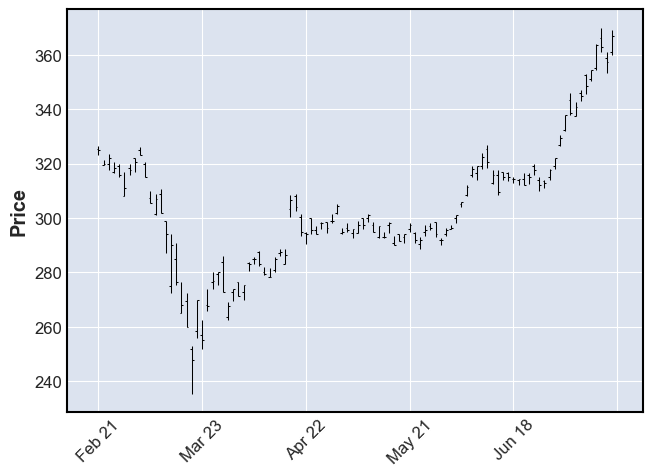

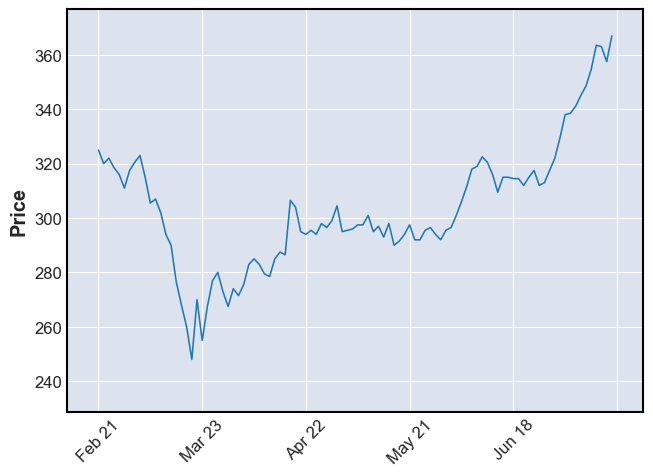

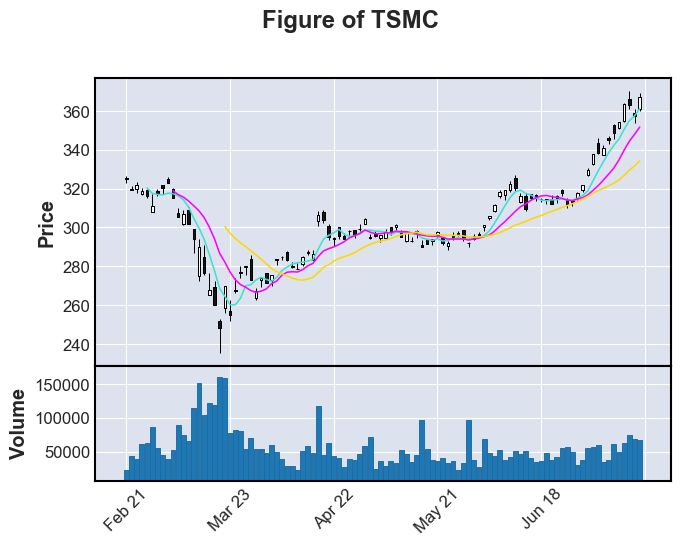

In [30]:
import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

SData = SData.tail(100)        # 取最後100筆

mpf.plot(SData)    # 使用預設的方式繪製股價 K線圖

mpf.plot(SData, type = 'line')   # 繪製股價折線圖

# 加上參數繪製股價圖
mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 10, 20))  # 5日線、10線、月線

            Open  High   Low  Close  Volume
Date                                       
2011-01-03  71.5  71.6  70.8   71.1   35747
2011-01-04  71.0  71.6  70.8   71.2   36048
2011-01-05  70.9  71.1  69.6   69.8   54327
2011-01-06  69.8  71.0  69.7   71.0   46802
2011-01-07  71.9  73.0  71.9   72.5  170328


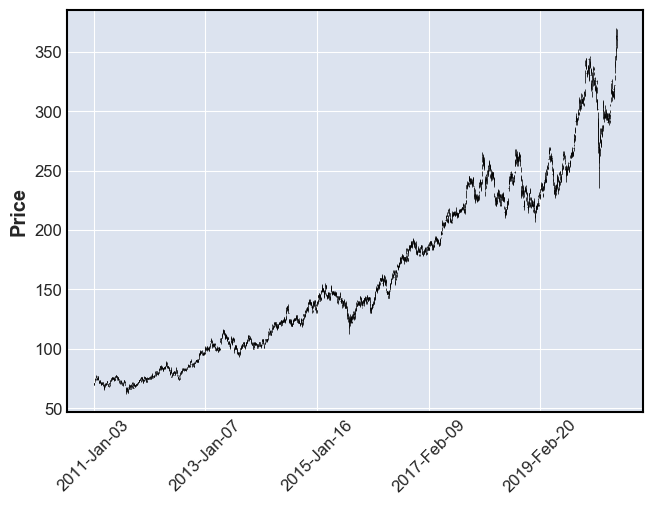

In [26]:
# new
# CSV檔案無欄位名稱時，pd.read_csv()需加入 names = ...，以設定欄位名稱

import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330_without_columns.csv', names =  ['Date', 'Open', 'High', 'Low', 'Close', 'Volume'],index_col = 'Date')
SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定
print(SData.head())
mpf.plot(SData)    # 使用預設的方式繪製股價 K線圖

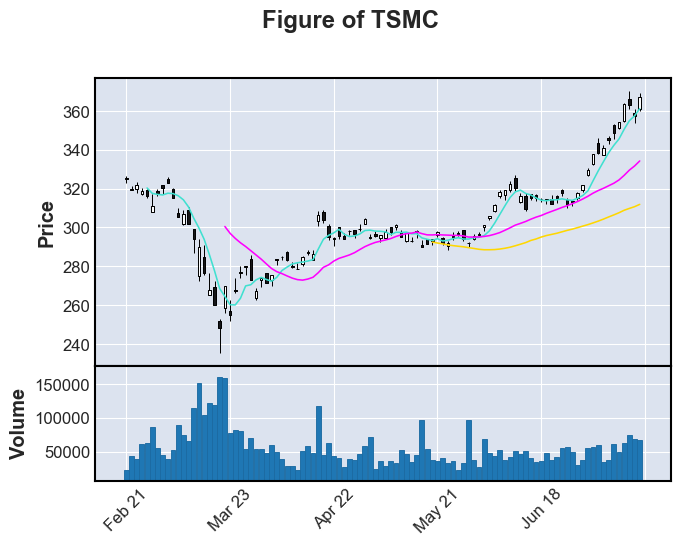

In [12]:
from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

mpf.plot(SData, type='candle',
        title='Figure of TSMC',
        ylabel='Price',
        ylabel_lower='Volume',
        volume=True, 
        mav=(5, 20, 60))  # 5日線、10日線、季線

### 改變 K線圖的顏色 

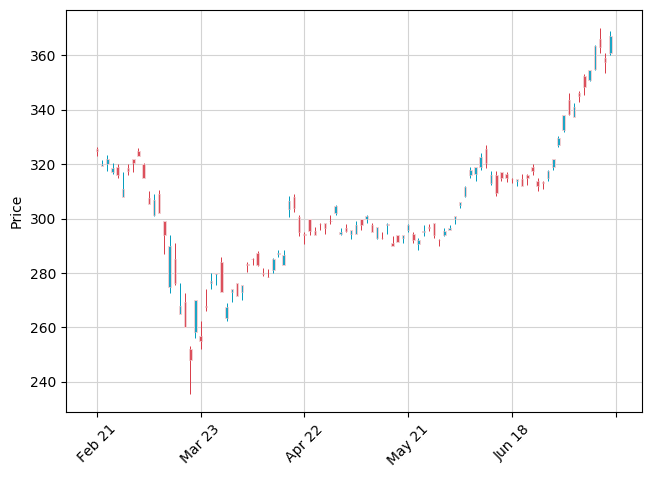

In [34]:
# 改變 K線圖的顏色 1

from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(100)        # 取最後100筆

mc = mpf.make_marketcolors(up='#049DBF', down='#D93D4A', volume='#F2C84B', 
    edge='#F2CED1', wick={'up':'#049DBF', 'down':'#D93D4A'})
cs  = mpf.make_mpf_style(marketcolors=mc, gridcolor="lightgray")

mpf.plot(SData, type='candle', style=cs)

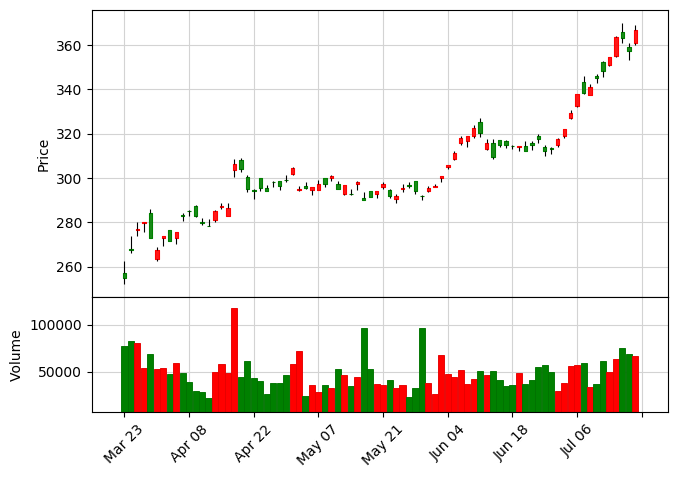

In [38]:
# 改變 K線圖的顏色 2

from datetime import datetime
import pandas as pd
import time
import mplfinance as mpf

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.tail(80)        # 取最後80筆

mc = mpf.make_marketcolors(up='r', down='g', volume='inherit', edge='inherit')
cs  = mpf.make_mpf_style(marketcolors=mc, gridcolor="lightgray")

mpf.plot(SData, type='candle', volume=True, style=cs)

### 選取部分資料

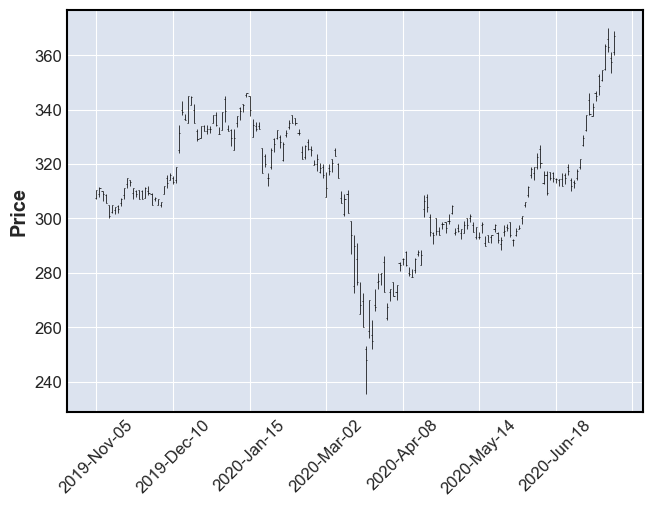

In [37]:
# 選取部分資料後畫圖 (建議使用此方法)

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)

SData = SData.loc['2019/11/05':,:]
# 選取 2019/11/05之後的資料

# SData = SData.loc['2019/11/05':'2020/7/10',:]  
# 選取 2019/11/05至 2020/7/10的資料

# SData = SData.loc['2019-11-06 15:00':'2019-11-06 16:00',:]


import mplfinance as mpf

mpf.plot(SData)

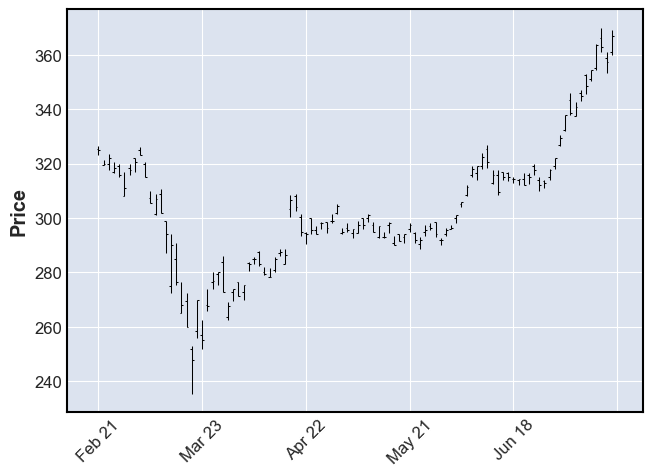

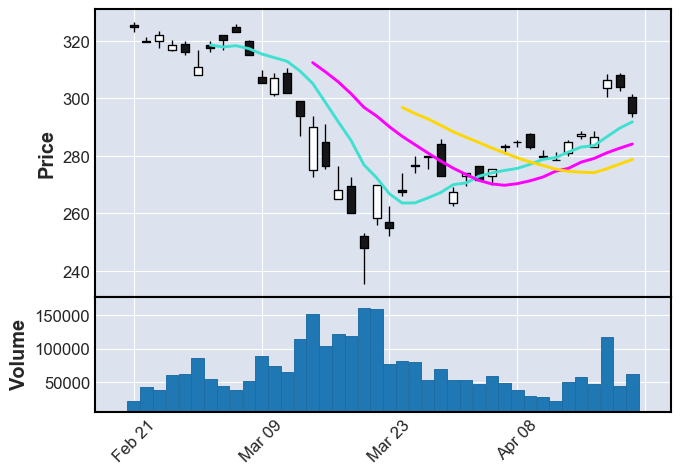

In [56]:
# 選取部分資料後畫圖

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData2 = SData.tail(100)  # 只取最後100筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf
mpf.plot(SData2)


setup = dict(type='candle',volume=True,mav=(7,15,22))
mpf.plot(SData2.iloc[0: 40],**setup)
# 只取最前面40筆的資料

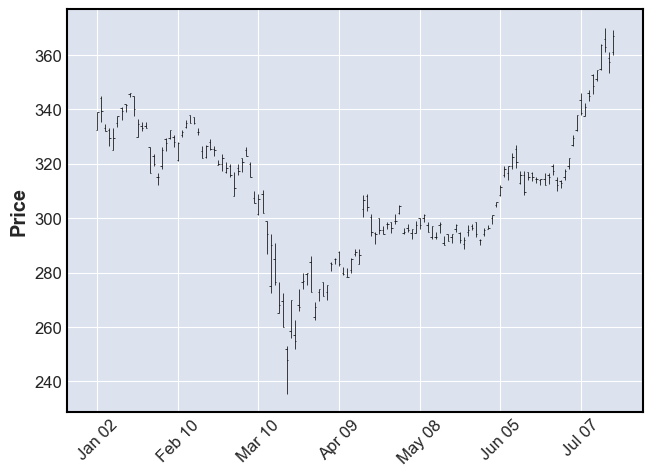

In [14]:
# 選取部分資料（例如只選取2020年的股票資料）後畫圖

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv')    
# 先不要設定index_col = 'Date'，之後再設定，以便選取部分資料

# SData2 = SData[SData['Date'].str.startswith('2020') | SData['Date'].str.startswith('2019')]  # 取部分資料
SData2 = SData[SData['Date'].str.startswith('2020')]  # 只取2020年的資料
SData2.index = SData2['Date']
# SData2.set_index("Date" , inplace=True)  #  上一行也可以使用這一行取代
SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf
mpf.plot(SData2)

### 把假日也畫出來

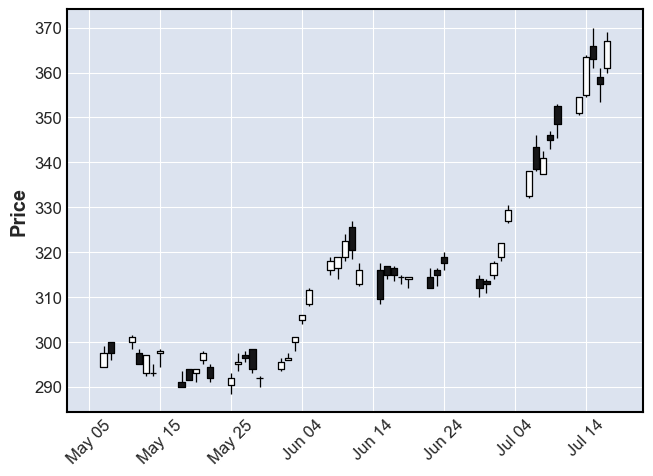

In [33]:
# 把假日也畫出來

# 選取部分資料後畫圖

from datetime import datetime
import pandas as pd
import mplfinance as mpf

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData2 = SData.tail(50)  # 只取最後100筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)

mpf.plot(SData2, type='candle', show_nontrading=True)

### 繪製不同的圖形

* 可以使用 mpf.available_styles() 來看有哪些 style可以使用

In [20]:
print(mpf.available_styles())


['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


In [6]:
# test


from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv')
print(SData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 6 columns):
Date      2343 non-null object
Open      2343 non-null float64
High      2343 non-null float64
Low       2343 non-null float64
Close     2343 non-null float64
Volume    2343 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 110.0+ KB
None


In [27]:
# test

# 繪製不同的圖形

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')  # 將 Date 欄位設為 index，但資料型態仍是 object，為字串
print(SData.info())

SData.index = pd.DatetimeIndex(SData.index)
print(SData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2011/1/3 to 2020/7/17
Data columns (total 5 columns):
Open      2343 non-null float64
High      2343 non-null float64
Low       2343 non-null float64
Close     2343 non-null float64
Volume    2343 non-null int64
dtypes: float64(4), int64(1)
memory usage: 109.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2343 entries, 2011-01-03 to 2020-07-17
Data columns (total 5 columns):
Open      2343 non-null float64
High      2343 non-null float64
Low       2343 non-null float64
Close     2343 non-null float64
Volume    2343 non-null int64
dtypes: float64(4), int64(1)
memory usage: 109.8 KB
None


Candle:


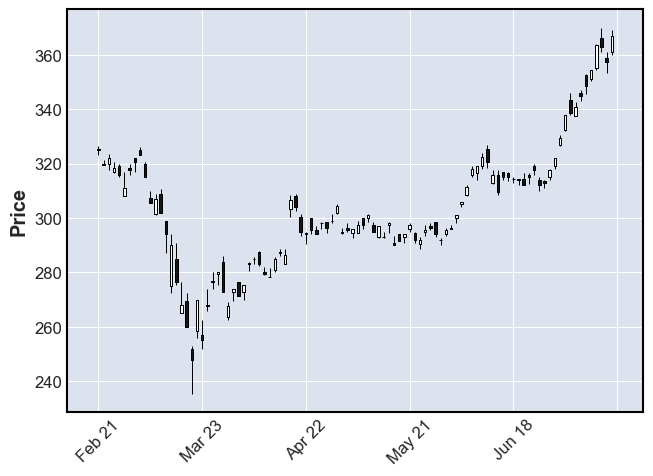

ohlc:


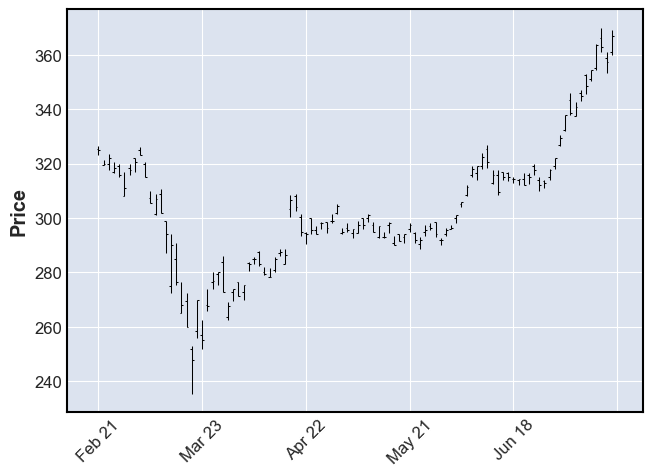

line:


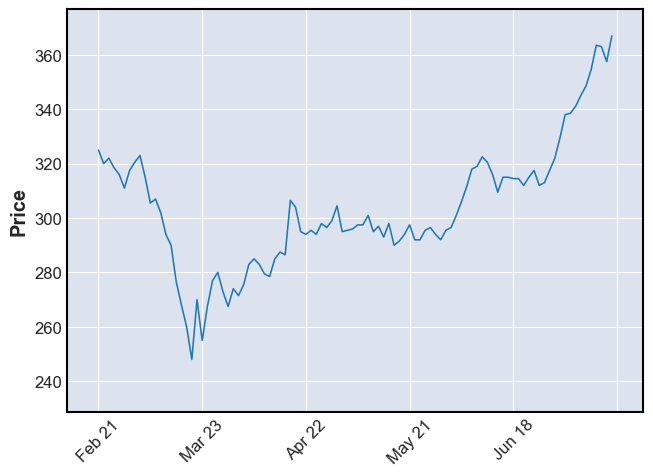

renko:


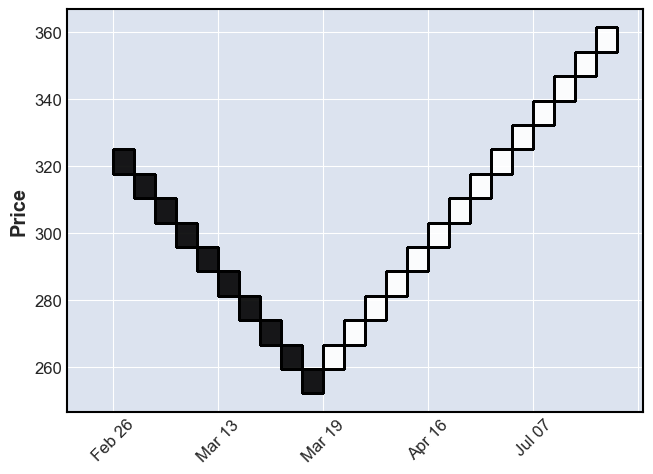

pnf:


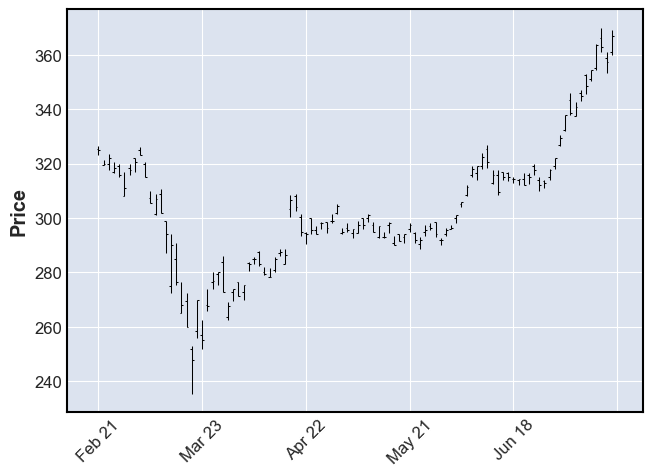

In [24]:
# 繪製不同的圖形

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData2 = SData.tail(100)  # 只取最後100筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf
print('Candle:')
mpf.plot(SData2, type = 'candle')
print('ohlc:')
mpf.plot(SData2, type = 'ohlc')
print('line:')
mpf.plot(SData2, type = 'line')
print('renko:')
mpf.plot(SData2, type = 'renko')
print('pnf:')
mpf.plot(SData2, type = 'ohlc')


# type='candle', type='line', type='renko', or type='pnf'

### 繪出移動平均線

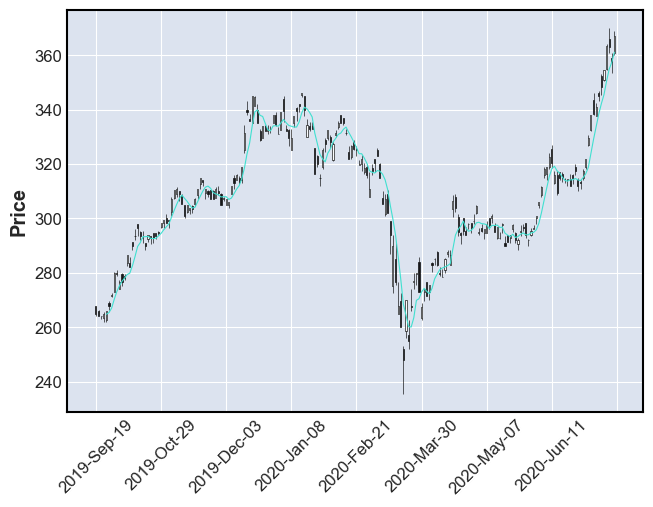

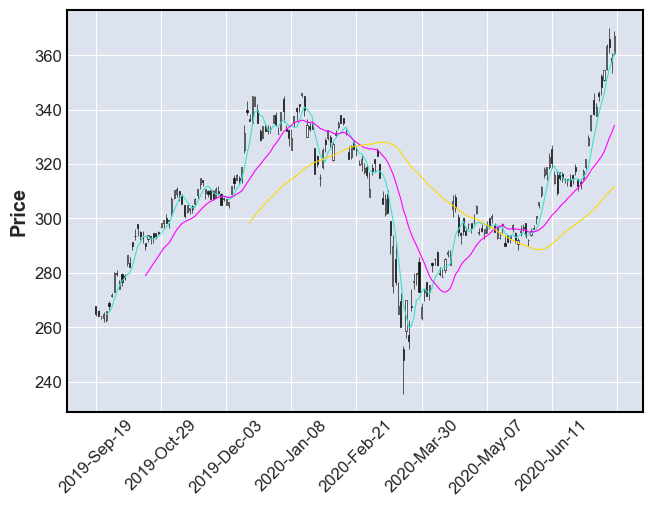

In [30]:
# 繪出移動平均線，如5日線、月線、季線

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData2 = SData.tail(200)  # 只取最後200筆的資料

SData2.index = pd.DatetimeIndex(SData2.index)


import mplfinance as mpf

mpf.plot(SData2, type = 'candle', mav = 5)  # 畫 5日線
mpf.plot(SData2, type = 'candle', mav = [5, 20, 60])   # 畫 5, 20, 60日線
# mpf.plot(SData2, type = 'candle', mav = (5, 20, 60)   # 畫 5, 20, 60日線，用 ()也可

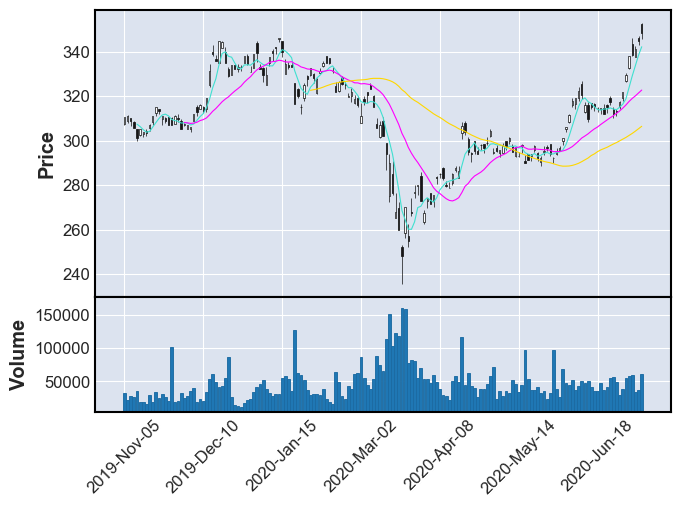

In [34]:
# 繪製移動平均線及成交量

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf

mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True)

## 圖形格式設定

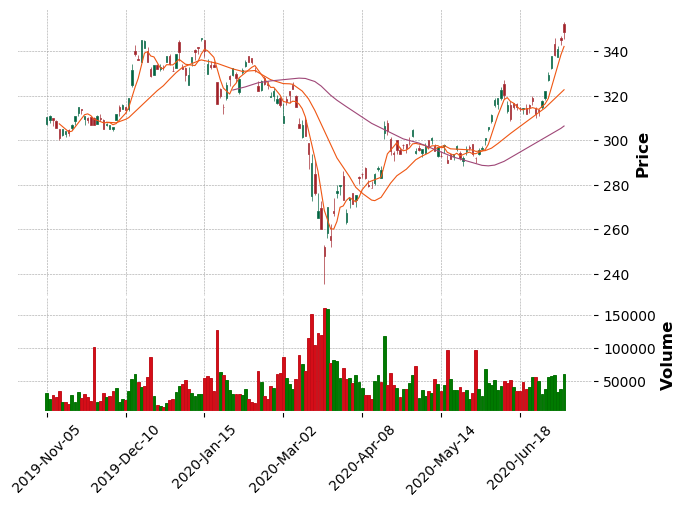

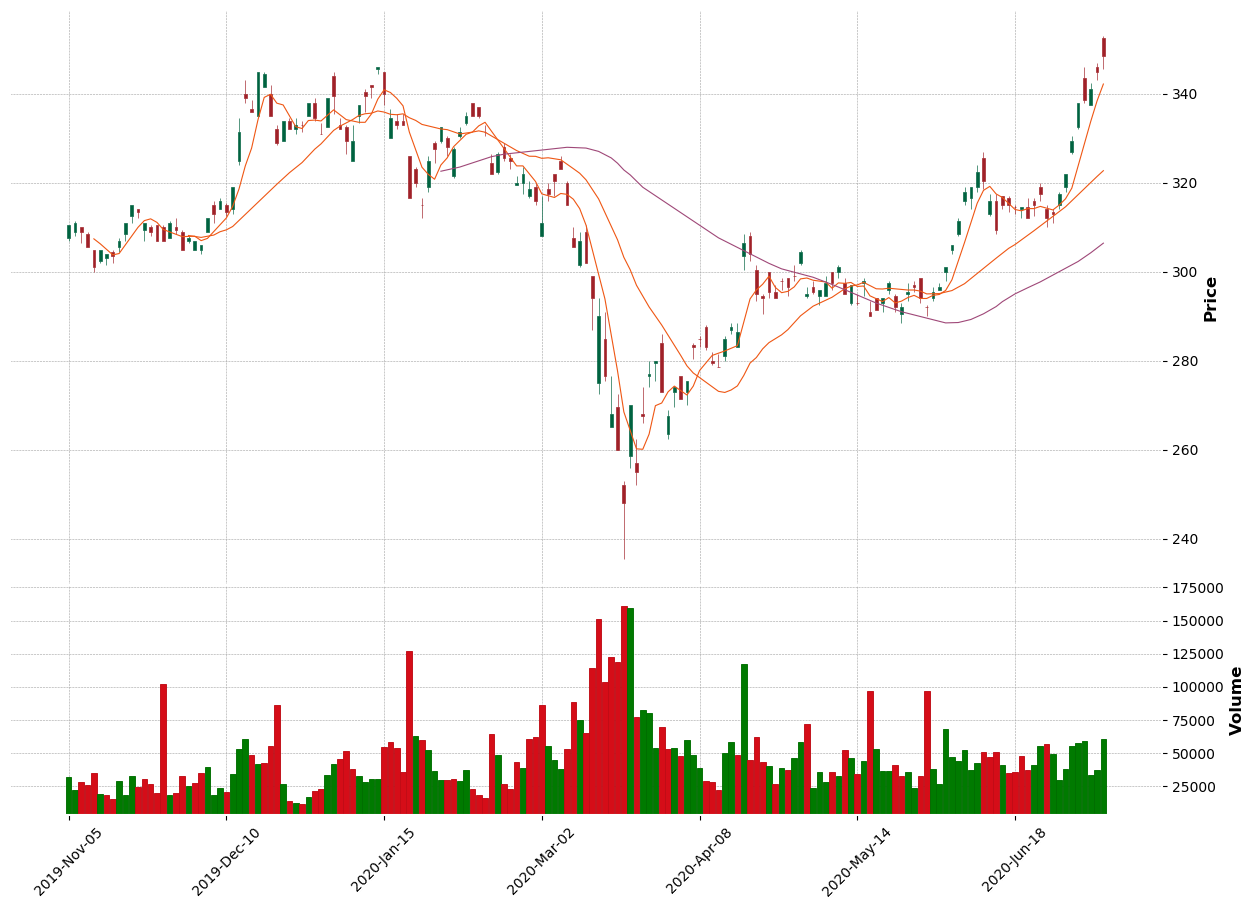

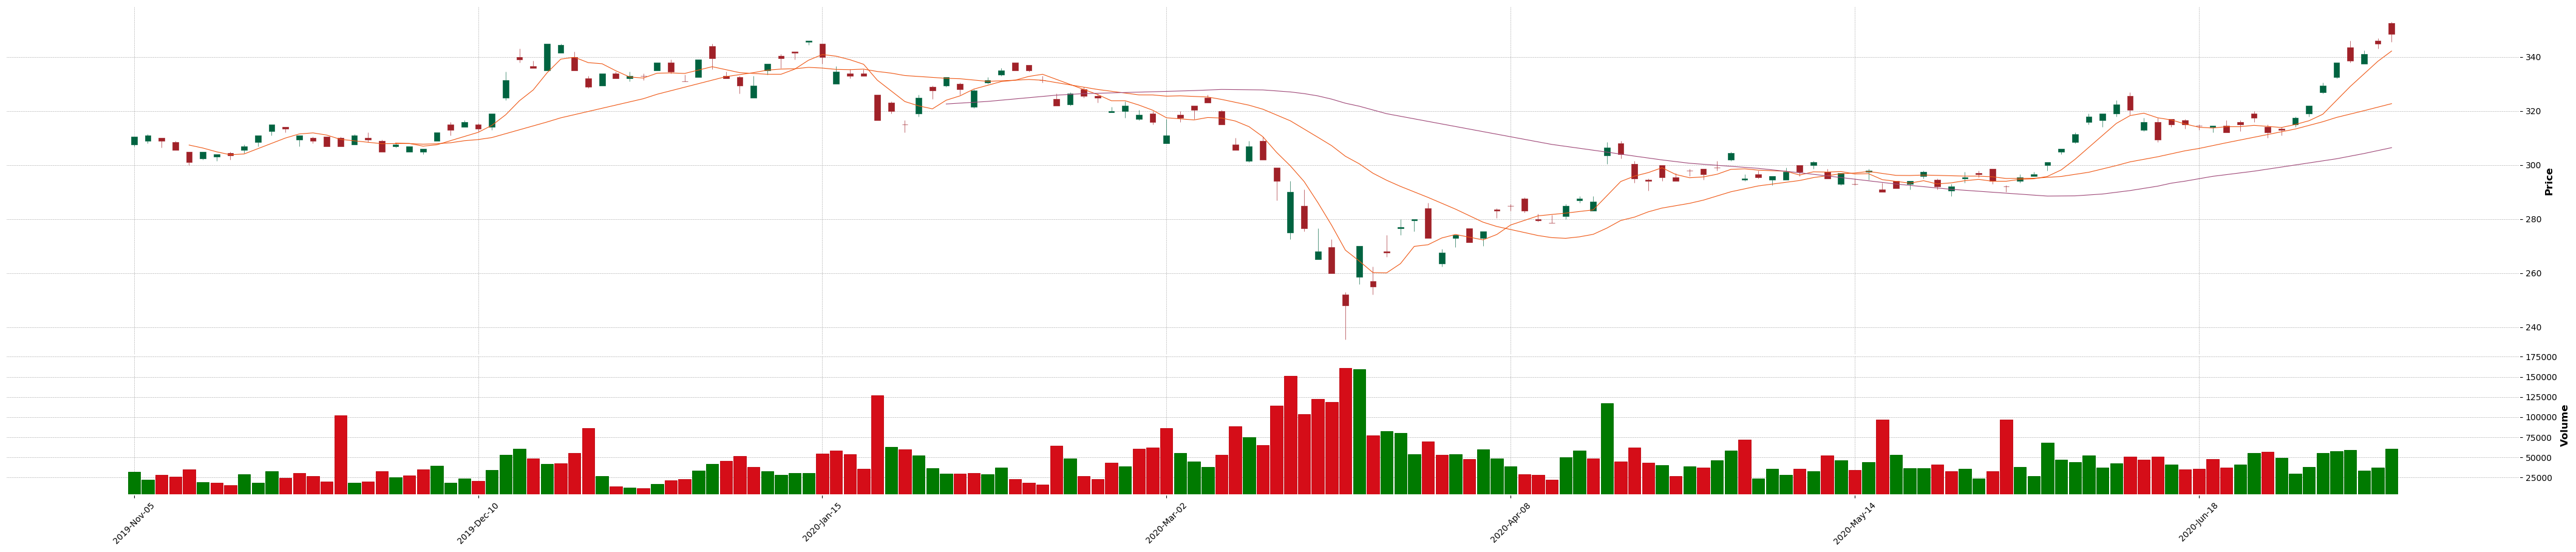

In [39]:
# 改變顏色(style)、圖案大小(figscale)、與長寬比例(figratio)
    # ：上漲使用紅色，下跌使用綠色
# style = 'charles'
# style = 'mike'    使用實心與空心來表示
# 可以使用 mpf.available_styles() 來看有哪些 style可以使用

from datetime import datetime
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

# SData2 = SData.tail(200)  # 只取最後200筆的資料

SData.index = pd.DatetimeIndex(SData.index)
SData = SData.loc['2019/11/05':'2020/7/10',:]


import mplfinance as mpf

mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles')
mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles', figscale = 2)     # 圖案大小
mpf.plot(SData, type = 'candle', mav = [5, 20, 60], volume = True, style ='charles', figscale = 2, figratio=(5,1))   # 長寬比例(figratio)

### 標題及軸標題

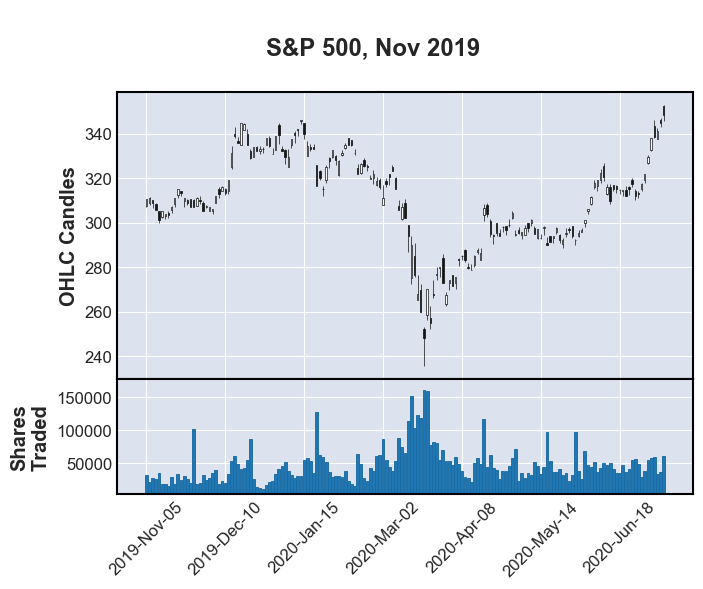

In [47]:
mpf.plot(SData,type='candle',volume=True,
         title='\nS&P 500, Nov 2019',
         ylabel='OHLC Candles',         # 價格的Y軸標題
         ylabel_lower='Shares\nTraded')  #下方量的標題

## x軸格式及旋轉

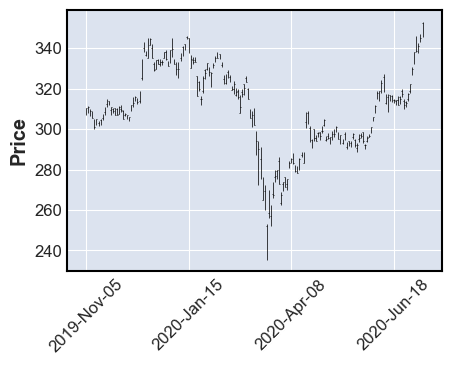

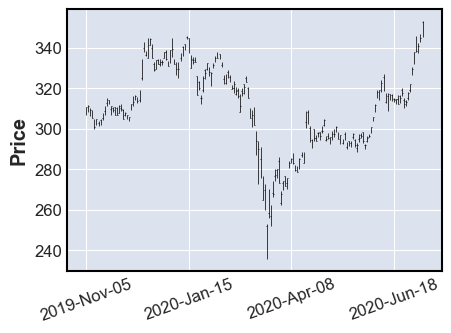

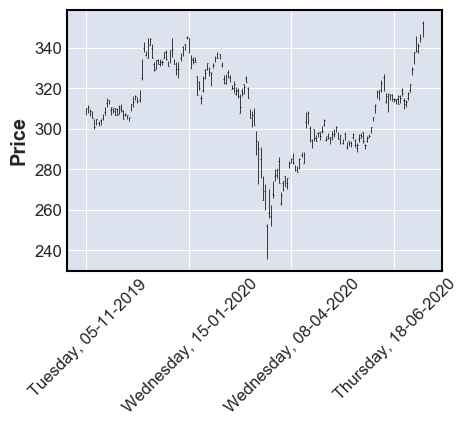

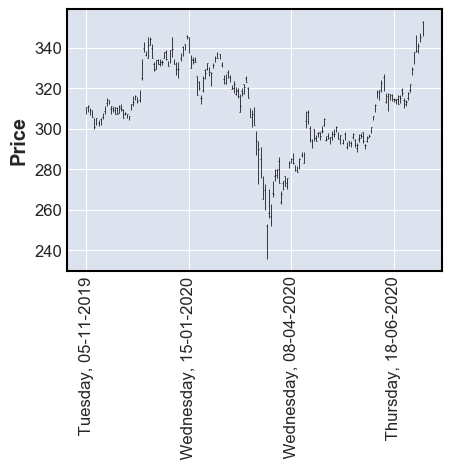

In [48]:
mpf.plot(SData,figscale=0.65)
mpf.plot(SData,figscale=0.65,xrotation=20)
mpf.plot(SData,figscale=0.65,datetime_format=' %A, %d-%m-%Y')
mpf.plot(SData,figscale=0.65,datetime_format=' %A, %d-%m-%Y',xrotation=90)

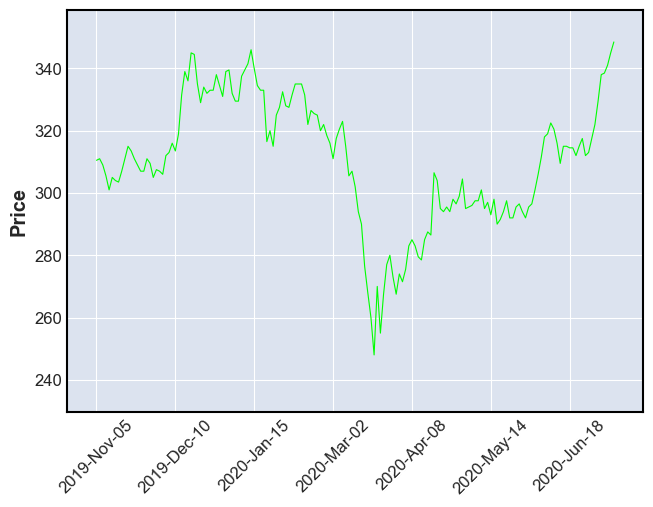

In [49]:
mpf.plot(SData, type='line', linecolor='#00ff00')

In [53]:
mpf.plot(SData, type='line', mav = (5, 20, 60), linecolor=('#00ff00', '#ff0000', '#0000ff', '#666666')

SyntaxError: unexpected EOF while parsing (<ipython-input-53-466da8cbb130>, line 1)

### bars narrower, but our candlesticks thicker

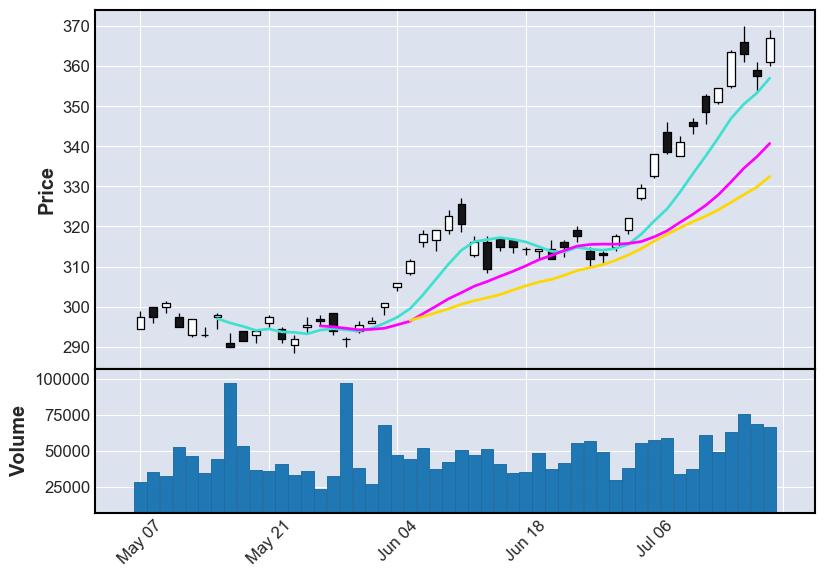

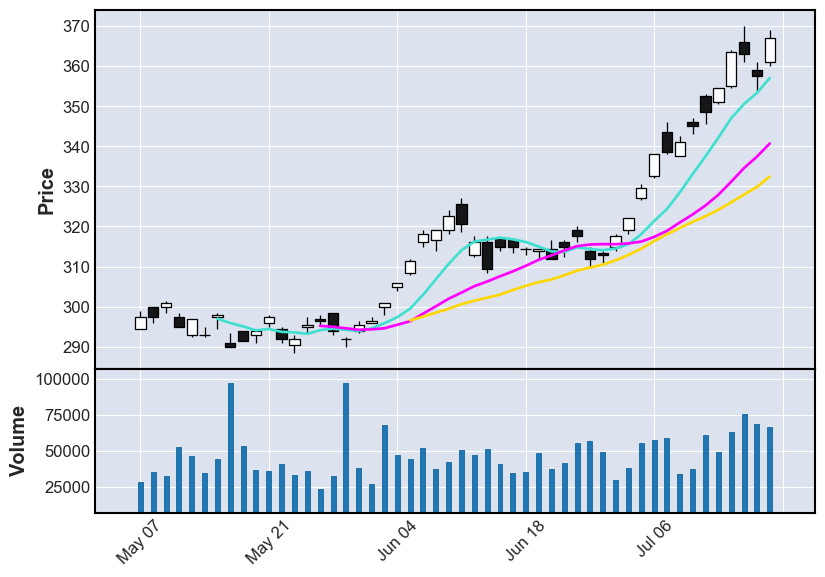

In [41]:
mpf.plot(SData2.iloc[0:80],type='candle',volume=True,mav=(7,15,22),figscale=1.25)
mpf.plot(SData2.iloc[0:80],type='candle',volume=True,mav=(7,15,22),figscale=1.25,scale_width_adjustment=dict(volume=0.4,candle=1.35))

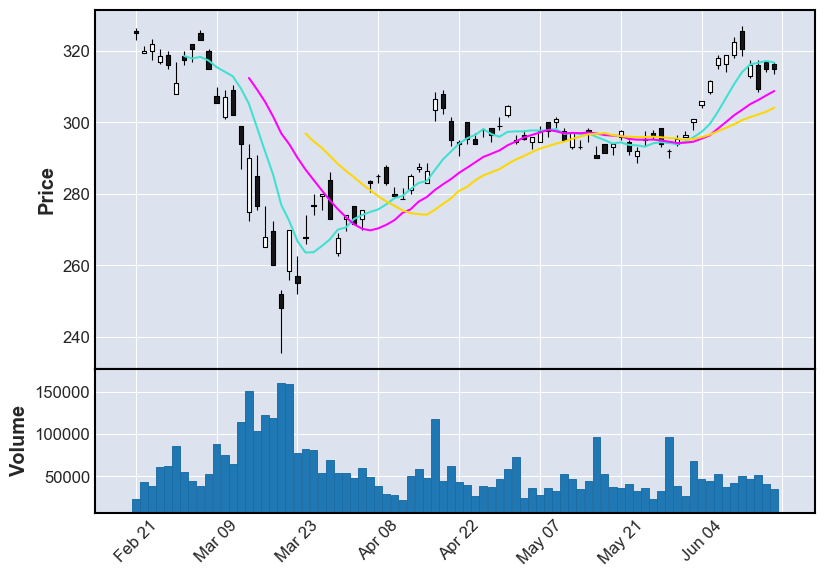

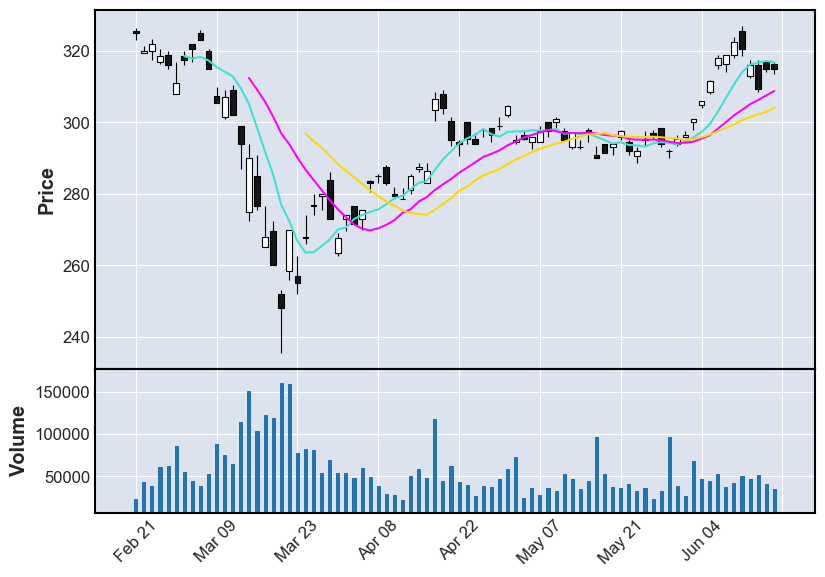

In [59]:
# 功能同上一個 cell

setup = dict(type='candle',volume=True,mav=(7,15,22),figscale=1.25)
mpf.plot(SData2.iloc[0:80],**setup)
mpf.plot(SData2.iloc[0:80],**setup,scale_width_adjustment=dict(volume=0.4,candle=1.35))

## 繪製價格與MA重疊圖表

In [32]:
# 5日MA的算法，方法一
# Lai
# 前面四個數的平均皆有平均


price = [i for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
    print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)
print('原始數字', price)
print('5日的MA:', MA)

近五個數字: [1]
近五個數字: [1, 2]
近五個數字: [1, 2, 3]
近五個數字: [1, 2, 3, 4]
近五個數字: [1, 2, 3, 4, 5]
近五個數字: [2, 3, 4, 5, 6]
近五個數字: [3, 4, 5, 6, 7]
近五個數字: [4, 5, 6, 7, 8]
近五個數字: [5, 6, 7, 8, 9]
近五個數字: [6, 7, 8, 9, 10]
近五個數字: [7, 8, 9, 10, 11]
近五個數字: [8, 9, 10, 11, 12]
近五個數字: [9, 10, 11, 12, 13]
近五個數字: [10, 11, 12, 13, 14]
近五個數字: [11, 12, 13, 14, 15]
近五個數字: [12, 13, 14, 15, 16]
近五個數字: [13, 14, 15, 16, 17]
近五個數字: [14, 15, 16, 17, 18]
近五個數字: [15, 16, 17, 18, 19]
原始數字 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
5日的MA: [1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


In [296]:
# 5日MA的算法，方法二
# Lai
# 前面四個數不取平均

price = [i for i in range(1, 20)]

MA2 = [np.nan] * 4
for i in range(4, len(price)):
    MA2.append((sum(price[i-4:i+1])/MAlen))
print(price)
print(MA2)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[nan, nan, nan, nan, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]


## 增加自訂的繪圖資料

Date
2011-01-03    106.65
2011-01-04    106.80
2011-01-05    104.70
2011-01-06    106.50
2011-01-07    108.75
               ...  
2020-07-13    531.75
2020-07-14    545.25
2020-07-15    544.50
2020-07-16    536.25
2020-07-17    550.50
Name: Close, Length: 2343, dtype: float64


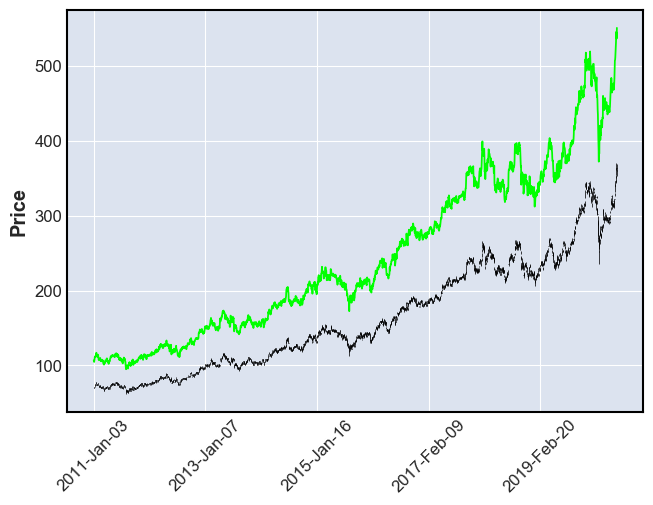

In [11]:
# 增加自訂資料的繪圖線

import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

import mplfinance as mpf

exp = SData['Close']*1.5
print(exp)

apds = mpf.make_addplot(exp,color='lime')   # 一條線的繪圖方式

# 多條線的繪圖方式
# apds = [mpf.make_addplot(exp12,color='lime'),
#         mpf.make_addplot(exp26,color='c'),
#         mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
#                          color='dimgray',alpha=1,secondary_y=False),
#         mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
#         mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
#        ]

mpf.plot(SData, addplot=apds)    # 繪製股價圖與多出來的圖，要多畫圖可以設定 addplot 參數


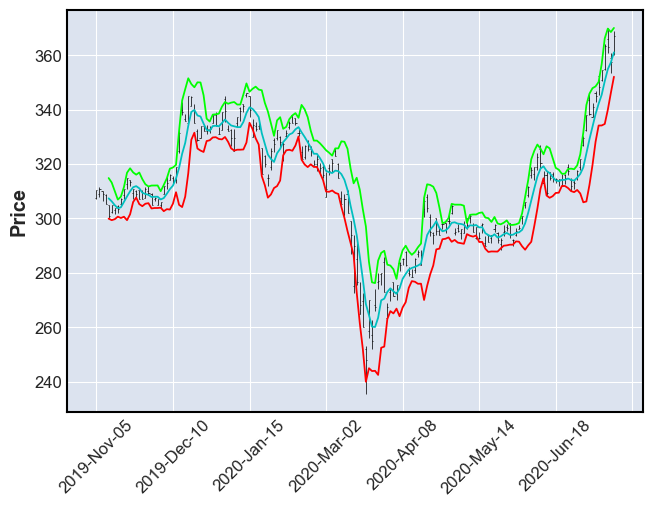

In [34]:
# 增加自訂的繪圖資料
# 布林通道

from talib import abstract
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

stock = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

stock = stock.loc['2019/11/05':,:]   # 取2019/11/05之後的資料

# abstract 需要的 columns 的名稱需要修改
stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume']    
a = abstract.BBANDS(stock2)

upper =a['upperband']
middle =a['middleband']
lower = a['lowerband']

apds = [mpf.make_addplot(upper,color='lime'),
        mpf.make_addplot(middle,color='c'),
        mpf.make_addplot(lower,color='r'),
       ]

mpf.plot(stock2, addplot=apds)    # 繪製股價圖


## 增加自訂的繪圖資料

Date
2011-01-03    106.65
2011-01-04    106.80
2011-01-05    104.70
2011-01-06    106.50
2011-01-07    108.75
               ...  
2020-07-13    531.75
2020-07-14    545.25
2020-07-15    544.50
2020-07-16    536.25
2020-07-17    550.50
Name: Close, Length: 2343, dtype: float64


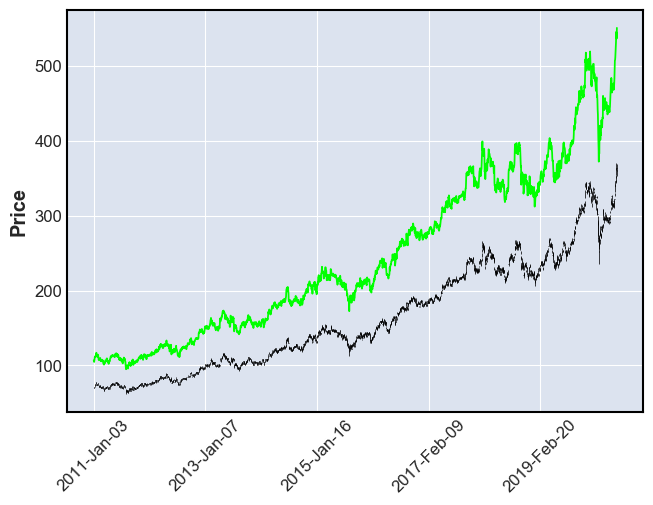

In [11]:
# 增加自訂資料的繪圖線

import mplfinance as mpf
import pandas as pd

SData = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')

SData.index = pd.DatetimeIndex(SData.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

import mplfinance as mpf

exp = SData['Close']*1.5
print(exp)

apds = mpf.make_addplot(exp,color='lime')   # 一條線的繪圖方式

# 多條線的繪圖方式
# apds = [mpf.make_addplot(exp12,color='lime'),
#         mpf.make_addplot(exp26,color='c'),
#         mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
#                          color='dimgray',alpha=1,secondary_y=False),
#         mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
#         mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
#        ]

mpf.plot(SData, addplot=apds)    # 繪製股價圖與多出來的圖，要多畫圖可以設定 addplot 參數


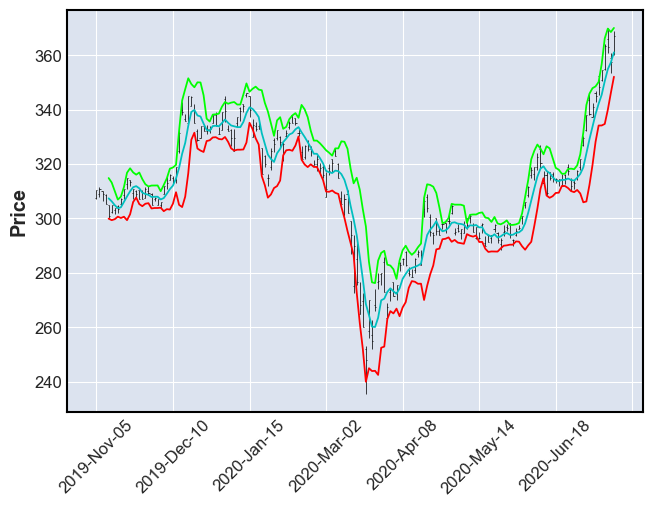

In [34]:
# 增加自訂的繪圖資料
# 布林通道

from talib import abstract
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

stock = pd.read_csv('data/pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

stock = stock.loc['2019/11/05':,:]   # 取2019/11/05之後的資料

# abstract 需要的 columns 的名稱需要修改
stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume']    
a = abstract.BBANDS(stock2)

upper =a['upperband']
middle =a['middleband']
lower = a['lowerband']

apds = [mpf.make_addplot(upper,color='lime'),
        mpf.make_addplot(middle,color='c'),
        mpf.make_addplot(lower,color='r'),
       ]

mpf.plot(stock2, addplot=apds)    # 繪製股價圖


## 繪製多圖的配置方式（有兩種方式）

* Panels Method （初學者建議使用）
    * Mplfinance allows users to create up to ten vertically stacked "panels", all sharing the same date/time x-axis.
    * https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
    * https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
* Matplotlib Method

Panels are identified by their "Panel ID", an integer ranging from 0 to 9.
Panel ID's are always numbered from top to bottom, thus:
Panel 0 is always the uppermost panel, Panel 1 is just below that, and so on.
The "main panel" is the panel where candlesticks/ohlc data are plotted.
In the above example, the "main panel" is in the middle (which in this example is Panel 1)

Users can choose which panel is the main panel, and on which panel to plot volume.
By default, if not specified, Panel 0 (the uppermost panel) is used for candlesticks/ohlc data.
By default, if not specified, Panel 1 (second from top) is used for volume.
Previous versions of mplfinance that supported only two panels called these panels "main" and "lower". For backwards compatibility, if any code passes in panel='main' that will be translated to panel=0 and panel='lower' will be translated to panel=1. Going forward, however, users should use only integers to identify panels.

From: https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb

In [ ]:
# https://github.com/matplotlib/mplfinance/blob/master/examples/panels.ipynb
# 待續

### 使用panel 加上繪製 MACD

* MACD (Moving Average Convergence Divergence)

In [63]:
# First use Pandas to calculate the 12 period and 26 period exponential moving averages:

exp12 = SData2['Close'].ewm(span=12, adjust=False).mean()
exp26 = SData2['Close'].ewm(span=26, adjust=False).mean()

# The MACD Line is defined as the difference between these two moving averages:
macd = exp12 - exp26

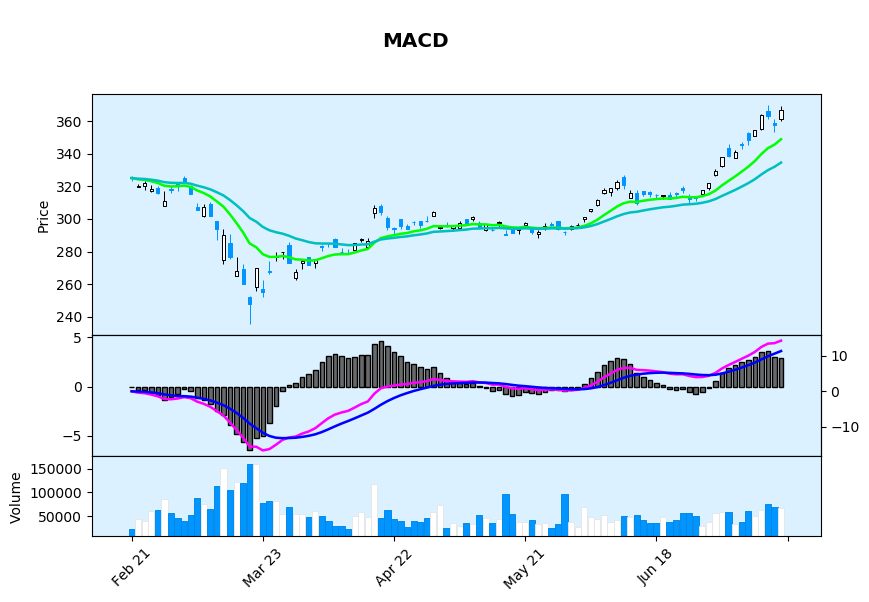

In [66]:
# The MACD Signal is defined as the 9 period exponential moving average of the MACD Line:
# We also calculate the difference between the MACD Line and the MACD Signal which we will plot as a histogram:


signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

mpf.plot(SData2,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style='blueskies',volume=True,volume_panel=2,panel_ratios=(6,3,2))


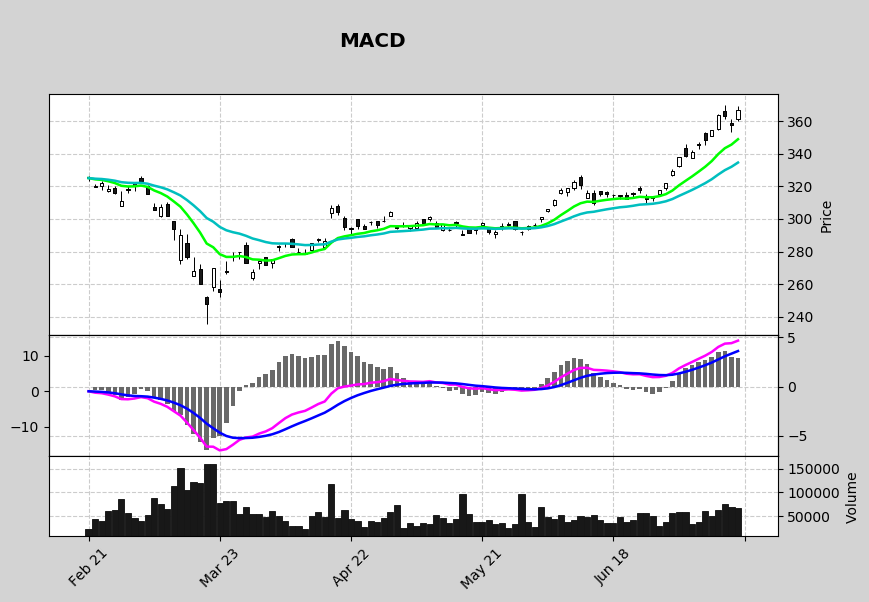

In [68]:
# different style:

s = mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'})

mpf.plot(SData2,type='candle',addplot=apds,figscale=1.1,figratio=(8,5),title='\nMACD',
         style=s,volume=True,volume_panel=2,panel_ratios=(6,3,2))

### 加上特殊的水平線或記號

In [43]:
# put a horizontal line for my RSI.
# https://github.com/matplotlib/mplfinance/issues/140

apds = [mpf.make_addplot(buy_signal,scatter=True,markersize=100,marker='^'),
        mpf.make_addplot(sell_signal,scatter=True,markersize=100,marker='v'),
        mpf.make_addplot(close_signal,scatter=True,markersize=100,marker='o'),
        mpf.make_addplot(line80,panel='lower',color='r'),
        mpf.make_addplot(line20,panel='lower',color='g'), 
        mpf.make_addplot(rsi,panel='lower',color='g') ]
    
mpf.plot(self.df,addplot=apds,figscale=2,volume=False,type = type,
                 title= str(self.info)
                 )

NameError: name 'buy_signal' is not defined